In [1]:

import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
%matplotlib inline
import warnings # To ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#### Summury 
- Its classification learning problem. (supervised)
- In this data we have catagorical targate variable that's why its a classification regrassion problem

# Describing our data

In [3]:
crop.shape

(2200, 8)

- In above step we got that we have 8 column and 2200 rows in our data
- in next step we'r going to check data type and our column are null or not

In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


- we can see in crop data information that 8 out of 7 column havig int and flot data type means numerical but remain 1 column which is also our targate variable  is in object data type i.e catagorical. So in our upcoming step we need to convert those catagorical value into a numerical value becos computer understand numbers.
 - ------------*** ----------- *** ---------

- For now we are going to check how many null values we have in our dataset.

In [5]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

- We dont have any null value in our dataset 
- now we are going to check that we have any duplicate values or not

In [6]:
crop.duplicated().sum()

0

- we got that we dont have any duplicate value

- now we are going to check Descriptive statistic of our data 

In [7]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [8]:
crop["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploring Data

- For EDA purous first we create "Heat map" for see corelation between attributs, but the heat map dont show catogorical data to us thats why we only select the attribute which have numerical data, For that we make new datafram conataining those attributes, which named as "df"

In [10]:
df = crop[["N","P","K","temperature","humidity","ph","rainfall"]]

df.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


- After creating new dataframe "df" we perform and create heatmap of that.

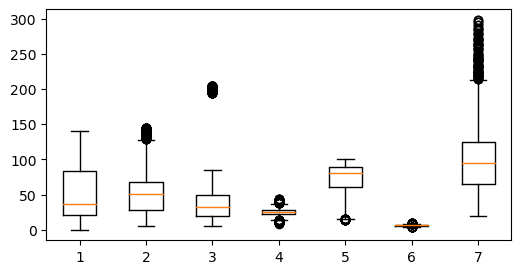

In [11]:
plt.figure(figsize =(6,3))
plt.boxplot(df)
plt.show()
    

<Axes: >

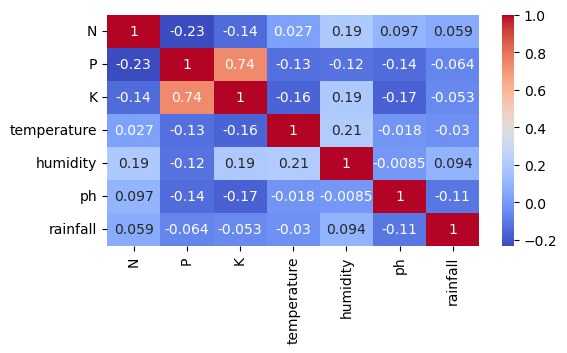

In [12]:
plt.figure(figsize=(6,3))
sns.heatmap(df.corr(), annot=True, cbar=True, cmap='coolwarm')


- so we can see in this heat map that 
- N shows +ve corelate to N itself and rainfall,ph,humidity,temprature. And -ve corelate with K and P.
- P shows +ve corelate to P itself and K. and -ve corelate with rainfall,ph,humidity,temprature and N.
- K shows +ve corelate to K itself and humidity & P and -ve corelate with rainfall,ph,temprature & k.
- temprature shows +ve corelate with temprature and humidity and N and -ve corelate with other
- humidity shows +ve corelate with humidity and rainfall,temp.,k,N and -ve corelate with ph and P.
- ph shows +ve corelate with ph and N and -ve corelate with others.
- rainfall shows +ve corelate with itself and humidity and n

# Encoding

- As we discuss before computer dont understand catagorical value and understand only numericals. Thats why we do encoding techniq where we convert catagorical data into numerical data.
- For that we create dictionary

In [13]:
crop_dict = {
    'rice' : 1,          
    'maize': 2,          
    'jute' : 3,          
    'cotton': 4,         
    'coconut':5,        
    'papaya':6,         
    'orange':7,         
    'apple':8,          
    'muskmelon':9,      
    'watermelon' :10,    
    'grapes':11,         
    'mango':12,          
    'banana':13,         
    'pomegranate':14,    
    'lentil' :15,        
    'blackgram' :16,    
    'mungbean' :17,      
    'mothbeans' :18,  
    'pigeonpeas' :19, 
    'kidneybeans':20,    
    'chickpea':21,       
    'coffee' :22        
    
}

# After creating the dictionary we do a mapping and create another column of numerical data respect
# to previus catagorical data

crop['crop_num'] = crop['label'].map(crop_dict)

In [14]:
crop['crop_num'].value_counts()

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [15]:
crop.drop('label',axis=1,inplace=True)

- In this code we drop the colume "label" bcoz we created inplace of that 'crop_num'

In [16]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


# Train test split

- For spliting the data we split data in X and Y where our independent variable are in X and dependent variable which is also our Trgate variable are in Y

In [17]:
X = crop.drop('crop_num',axis=1)
y = crop['crop_num']
     

In [18]:
X.shape

(2200, 7)

In [19]:
y.shape

(2200,)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- in this code now we split our data in four part
  X_train: This contains the features of the training set.
  X_test: This contains the features of the testing set.
  y_train: This contains the target variable values corresponding to the training set.
  y_test: This contains the target variable values corresponding to the testing set.
- we assign a X, y test size is 0.2 which mean our 20% of data converted in test data and remain 80% is our test data
- the random state is give us a randome shuffeled value for train test data we assign 42 no on that which dont have specific reson nut when next time we call random stste 42 it gives us same randomness in data

- for cheking our split we check the shape of train and test data

In [22]:
X_train.shape

(1760, 7)

In [23]:
X_test.shape

(440, 7)

## Scale the features using MinMaxScaler

- Min max scale - 
           Min-Max scaling transforms the data to a specific range, making it sensitive to outliers but preserving the shape of the original distribution and is sensitive to outliers.

In [24]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

ms.fit(X_train)
X_train = ms.transform(X_train)
X_test = ms.transform(X_test)

In [25]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

- we can see here our hole data convrted in range in array format

## Standardization

- Standardization=
          Standardization centers the data around 0 with a standard deviation of 1, making it robust to outliers but doesn't bound the values within a specific range.It's useful when the distribution of the feature is not normal or when the data has outliers.

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [27]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

# Training Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC (),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
    
}



for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print (f"{name} with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression with accuracy : 0.9636363636363636
Naive Bayes with accuracy : 0.9954545454545455
Support Vector Machine with accuracy : 0.9681818181818181
K-Nearest Neighbors with accuracy : 0.9590909090909091
Decision Tree with accuracy : 0.9840909090909091
Random Forest with accuracy : 0.9931818181818182
Bagging with accuracy : 0.9863636363636363
AdaBoost with accuracy : 0.1409090909090909
Gradient Boosting with accuracy : 0.9818181818181818
Extra Trees with accuracy : 0.9068181818181819


In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9931818181818182

# Predictive system

In [30]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install -U gradio



Could not fetch URL https://pypi.org/simple/gradio/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/gradio/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)'))) - skipping


In [32]:
import gradio as gr
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Sample data (replace this with your actual data)
X_train = np.array([[92, 47, 43, 20.23, 80.43, 7.34, 256.35],
                    [93, 44, 49, 21.43, 81.44, 7.56, 228.66],
                    [84, 49, 41, 22.56, 86.34, 6.89, 258.99],
                    [89, 41, 39, 20.85, 88.88, 6.49, 214.36],
                    [91, 42, 44, 21.55, 89.45, 7.39, 249.34]])
y_train = np.array([2, 10, 3, 8, 7])

# Initialize and train your Random Forest Classifier model
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)

rf = RandomForestClassifier()
rf.fit(X_train_scale, y_train)

# Define prediction function
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    # Scale the input features
    input_features = scaler.transform([[N, P, K, temperature, humidity, ph, rainfall]])
    # Predict crop
    prediction = rf.predict(input_features)
    
    # Map numerical output to crop names
    crop_names = {1:'rice', 2:'maize', 3:'chickpea', 4:'kidneybeans', 5:'pigeonpeas',
                 6:'mothbeans', 7: 'mungbean', 8:'blackgram', 9:'lentil', 10:'pomegranate',
                 11:'banana', 12:'mango', 13:'grapes', 14:'watermelon', 15:'muskmelon', 17:'apple',
                 18:'orange', 19:'papaya',20:'coconut', 21:'cotton', 22:'jute',23: 'coffee'}
    return crop_names[prediction[0]]  # Convert numerical output to crop name
    
    
# Create Gradio Interface
N_input = gr.Number(label="Nitrogen(rang:0-150)")
P_input = gr.Number(label="Phosphorus(rang:5-150)")
K_input = gr.Number(label="Potassium(rang:5-210)")
temperature_input = gr.Number(label="Temperature(rang:8-45)")
humidity_input = gr.Number(label="Humidity(rang:14-100)")
ph_input = gr.Number(label="pH(rang:3-10)")
rainfall_input = gr.Number(label="Rainfall(rang:15-300")

output_text = gr.Textbox(label="Predicted Crop")

gr.Interface(fn=predict_crop,
             inputs=[N_input, P_input, K_input, temperature_input, humidity_input, ph_input, rainfall_input],
             outputs=output_text,
             title="Crop Prediction",
             description="Enter environmental conditions to predict crop suggestion").launch(share=True)


Running on local URL:  http://127.0.0.1:7860


Exception in thread Thread-11 (_do_normal_analytics_request):
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3.1\Lib\site-packages\httpx\_transports\default.py", line 69, in map_httpcore_exceptions
    yield
  File "C:\Users\hp\anaconda3.1\Lib\site-packages\httpx\_transports\default.py", line 233, in handle_request
    resp = self._pool.handle_request(req)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3.1\Lib\site-packages\httpcore\_sync\connection_pool.py", line 216, in handle_request
    raise exc from None
  File "C:\Users\hp\anaconda3.1\Lib\site-packages\httpcore\_sync\connection_pool.py", line 196, in handle_request
    response = connection.handle_request(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3.1\Lib\site-packages\httpcore\_sync\connection.py", line 99, in handle_request
    raise exc
  File "C:\Users\hp\anaconda3.1\Lib\site-packages\httpcore\_sync\connection.py", line 76, in handle_request
    stream = self


Could not create share link. Missing file: C:\Users\hp\anaconda3.1\Lib\site-packages\gradio\frpc_windows_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_windows_amd64.exe
2. Rename the downloaded file to: frpc_windows_amd64_v0.2
3. Move the file to this location: C:\Users\hp\anaconda3.1\Lib\site-packages\gradio
